In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error as mse
from sklearn.cross_validation import train_test_split
import time
import sys
import time
import pickle

try:
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter
    import matplotlib.pyplot as plt
except:
    pass

%pylab inline
import GPyOpt
import GPy
from scipy import optimize as opt

/home/lisov/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


# Rosenbrock to optimize

In [33]:
def reshape(x,input_dim):
    x = np.array(x)
    if x.size ==input_dim:
        x = x.reshape((1,input_dim))
    return x

In [34]:
### TWO_DIMENTIONAL ###

class function2d:
    
    def plot(self):
        bounds = self.bounds
        x1 = np.linspace(bounds[0][0], bounds[0][1], 100)
        x2 = np.linspace(bounds[1][0], bounds[1][1], 100)
        X1, X2 = np.meshgrid(x1, x2)
        X = np.hstack((X1.reshape(100*100,1),X2.reshape(100*100,1)))
        Y = self.f(X)  
            
        plt.figure()    
        plt.contourf(X1, X2, Y.reshape((100,100)),100)
        if (len(self.min)>1):    
            plt.plot(np.array(self.min)[:,0], np.array(self.min)[:,1], 'w.', markersize=20, label=u'Observations')
        else:
            plt.plot(self.min[0][0], self.min[0][1], 'w.', markersize=20, label=u'Observations')
        plt.colorbar()
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.title(self.name)
        plt.show()


class rosenbrock(function2d):

    def __init__(self,bounds=None,sd=None):
        self.input_dim = 2
        if bounds is  None: self.bounds = [(-0.5,2),(-1.5,2)]
        else: self.bounds = bounds
        self.min = [(1, 1)]
        self.fmin = 0
        if sd==None: self.sd = 0
        else: self.sd=sd
        self.name = 'Rosenbrock'

    def f(self,X):
        X = reshape(X,self.input_dim)
        n = X.shape[0]
        if X.shape[1] != self.input_dim:
            return 'Wrong input dimension'
        else:
            fval = 100*(X[:,1]-X[:,0]**2)**2 + (X[:,0]-1)**2
            if self.sd ==0:
                noise = np.zeros(n).reshape(n,1)
            else:
                noise = np.random.normal(0,self.sd,n).reshape(n,1)
            return fval.reshape(n,1) + noise


In [35]:
### N_DIMENTIONAL ###

class rosenbrock_nd():

    def __init__(self, n_dim, bounds, sd=None):
        self.input_dim = n_dim
        self.bounds = bounds
        self.min = [1] * n_dim
        self.fmin = 0
        if sd==None: self.sd = 0
        else: self.sd=sd
        self.name = 'Rosenbrock_ND'

 
    def f(self,X):
        X = reshape(X,self.input_dim)
        n = X.shape[0]
        if X.shape[1] != self.input_dim:
            return 'Wrong input dimension'
        else:
            fval = 100*(X[:,1]-X[:,0]**2)**2 + (X[:,0]-1)**2
            if self.sd ==0:
                noise = np.zeros(n).reshape(n,1)
            else:
                noise = np.random.normal(0,self.sd,n).reshape(n,1)
            return fval.reshape(n,1) + noise

# Different functions for optimization

In [62]:
#ROSENBROCK TWO_DIM

func = rosenbrock()
X = (1, 1)
print(func.f(X))

[[0.]]


In [7]:
#ROSENBROCK 4_DIM

func_4d = rosenbrock_nd(4, ((0, 2), (0, 2), (0, 2), (0, 2)))
print(func_4d.f((1, 1, 1, 1)))

[[0.]]


In [36]:
#ROSENBROCK 8_DIM

func_8d = rosenbrock_nd(8, ((0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2), (0, 2)))
print(func_8d.f((1, 1, 1, 1, 1, 1, 1, 1)))

[[0.]]


In [40]:
#BRANIN

func_br  = GPyOpt.objective_examples.experiments2d.branin()
#func_br.plot()
X = (9.42478,2.475)
func_br.f(X)

array([[0.39788736]])

In [80]:
#DROPWAVE

func_drw  = GPyOpt.objective_examples.experiments2d.dropwave()
X = (0, 0)
func_drw.f(X)

array([[1.]])

In [5]:
#SIX-HUMP CAMEL

func_shc  = GPyOpt.objective_examples.experiments2d.sixhumpcamel()
#func_shc.plot()

# Creating the field

In [43]:
#BRANIN

num = 75
x1 = np.linspace(-5, 10, num)
x2 = np.linspace(0, 15, num)
X1, X2 = np.meshgrid(x1, x2)

X1_ = X1.reshape(num*num, 1)
X2_ = X2.reshape(num*num, 1)
X = np.hstack((X1_, X2_))

Y = func_br.f(X)

In [44]:
X_full = X.reshape(num*num, 2)
y_full = Y
print(f'Full shapes:{X_full.shape, y_full.shape}')

Full shapes:((5625, 2), (5625, 1))


In [83]:
#DROPWAVE

num = 40
x1 = np.linspace(-1, 1, num)
x2 = np.linspace(-1, 1, num)
X1, X2 = np.meshgrid(x1, x2)

X1_ = X1.reshape(num*num, 1)
X2_ = X2.reshape(num*num, 1)
X = np.hstack((X1_, X2_))

Y = func_drw.f(X)

In [84]:
X_full = X.reshape(num*num, 2)
y_full = Y
print(f'Full shapes:{X_full.shape, y_full.shape}')

Full shapes:((1600, 2), (1600, 1))


In [6]:
#SIX-HUMP CAMEL

num = 50
x1 = np.linspace(-1, 1, num)
x2 = np.linspace(-2, 2, num)
X1, X2 = np.meshgrid(x1, x2)

X1_ = X1.reshape(num*num, 1)
X2_ = X2.reshape(num*num, 1)
X = np.hstack((X1_, X2_))

Y = func_shc.f(X)

In [7]:
X_full = X.reshape(num*num, 2)
y_full = Y
print(f'Full shapes:{X_full.shape, y_full.shape}')

Full shapes:((2500, 2), (2500, 1))


In [63]:
#ROSENBROCK TWO_DIM

num = 20
x1 = np.linspace(0, 2, num)
x2 = np.linspace(0, 2, num)
X1, X2 = np.meshgrid(x1, x2)

X1_ = X1.reshape(num*num, 1)
X2_ = X2.reshape(num*num, 1)
X = np.hstack((X1_, X2_))

Y = func.f(X)

In [64]:
X_full = X.reshape(num*num, 2)
y_full = Y
print(f'Full shapes:{X_full.shape, y_full.shape}')

Full shapes:((400, 2), (400, 1))


In [16]:
#ROSENBROCK 4_DIM

n_dim = 4    #size_of dimention
num = 10   #number of samples in the bounds

x1 = np.linspace(-1, 3, num)
x2 = np.linspace(-1, 3, num)
x3 = np.linspace(-1, 3, num)
x4 = np.linspace(-1, 3, num)
X1, X2, X3, X4 = np.meshgrid(x1, x2, x3, x4)

X1_ = X1.reshape(num**4, 1)
X2_ = X2.reshape(num**4, 1)
X3_ = X3.reshape(num**4, 1)
X4_ = X4.reshape(num**4, 1)

X_a = np.hstack((X1_, X2_))
X_b = np.hstack((X3_, X4_))
X   = np.hstack((X_a, X_b))
#print(X)

Y = func_4d.f(X)

In [17]:
X_full = X.reshape(num**4, 4)
y_full = Y
print(f'Full shapes:{X_full.shape, y_full.shape}')

Train shapes:((10000, 4), (10000, 1))


In [37]:
#ROSENBROCK 8_DIM

n_dim = 8    #size_of dimention
num = 4   #number of samples in the bounds

x1 = np.linspace(0,  2, num)
x2 = np.linspace(0,  2, num)
x3 = np.linspace(0,  2, num)
x4 = np.linspace(0,  2, num)
x5 = np.linspace(0,  2, num)
x6 = np.linspace(0,  2, num)
x7 = np.linspace(0,  2, num)
x8 = np.linspace(0,  2, num)
X1, X2, X3, X4, X5, X6, X7, X8 = np.meshgrid(x1, x2, x3, x4, x5, x6, x7, x8)

X1_ = X1.reshape(num**8, 1)
X2_ = X2.reshape(num**8, 1)
X3_ = X3.reshape(num**8, 1)
X4_ = X4.reshape(num**8, 1)
X5_ = X5.reshape(num**8, 1)
X6_ = X6.reshape(num**8, 1)
X7_ = X7.reshape(num**8, 1)
X8_ = X8.reshape(num**8, 1)

X_a = np.hstack((X1_, X2_))
X_b = np.hstack((X3_, X4_))
X_c = np.hstack((X5_, X6_))
X_d = np.hstack((X7_, X8_))

X_aa = np.hstack((X_a, X_b))
X_bb = np.hstack((X_c, X_d))

X   = np.hstack((X_aa, X_bb))
print(X)

Y = func_8d.f(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.66666667]
 [0.         0.         0.         ... 0.         0.         1.33333333]
 ...
 [2.         2.         2.         ... 2.         2.         0.66666667]
 [2.         2.         2.         ... 2.         2.         1.33333333]
 [2.         2.         2.         ... 2.         2.         2.        ]]


In [38]:
X_full = X.reshape(num**8, 8)
y_full = Y
print(f'Full shapes:{X_full.shape, y_full.shape}')

Full shapes:((65536, 8), (65536, 1))


# Train & test

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, 
                                                    test_size=0.8, random_state=322)

# Creating NN

In [40]:
ndim = X_train.shape[1] #dimention
layers = [256,128,128,128]

learning_rate_decay = .97
start_learning_rate = 3e-4
learning_rate_schedule_epochs = 2000


tf.reset_default_graph()  #Clears the default graph stack and resets the global default graph.

# placeholders
x = tf.placeholder(tf.float32, [None, ndim]) 
y_ = tf.placeholder(tf.float32, [None, 1])

learning_rate_ = tf.placeholder(tf.float32)
forces_coeff_ = tf.placeholder(tf.float32)
keep_probability_ = tf.placeholder(tf.float32, name='keep_probability')
l2_reg_ = tf.placeholder(tf.float32, name='l2reg')

# weights
W1 = tf.Variable(tf.truncated_normal([ndim, layers[0]], stddev=(2/ndim)**.5))
b1 = tf.Variable(tf.truncated_normal([layers[0]],  stddev=.1))
h1 = tf.nn.relu(tf.matmul(x, W1) + b1)
h_drop1 = tf.nn.dropout(h1, keep_probability_, noise_shape = [1,layers[0]])
Ws = [W1]; bs = [b1]; hs = [h_drop1]
for cnt_layer in range(1, len(layers)):
    Ws.append(tf.Variable(tf.truncated_normal([layers[cnt_layer - 1], layers[cnt_layer]], 
                                              stddev=(2/layers[cnt_layer - 1])**.5)))
    bs.append(tf.Variable(tf.truncated_normal([layers[cnt_layer]],  stddev=.1))) 
    hs.append(tf.nn.dropout(tf.nn.relu(tf.matmul(hs[-1], Ws[-1]) + bs[-1]), keep_probability_,
                            noise_shape = [1,layers[cnt_layer]])) # noise shape is important
Ws.append(tf.Variable(tf.truncated_normal([layers[-1], 1], stddev=.1)))
bs.append(tf.Variable(tf.truncated_normal([1],  stddev=.1)))

# losses and outputs
y = tf.matmul(hs[-1], Ws[-1]) + bs[-1]
l2_regularizer = sum(tf.nn.l2_loss(Wxxx) for Wxxx in Ws) 
mse_e = tf.losses.mean_squared_error(predictions = y, labels = y_)
loss = mse_e + l2_reg_*l2_regularizer

# some extra stuff for learning rate decay
global_step = tf.Variable(0, trainable=False)
starter_learning_rate = start_learning_rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step,
                                           learning_rate_schedule_epochs, learning_rate_decay, staircase=True)
#Applies exponential decay to the learning rate.

lr_fun = lambda: learning_rate
min_lr = lambda: tf.constant(1e-5)
actual_lr = tf.case([(tf.less(learning_rate, tf.constant(1e-5)), min_lr)], default=lr_fun)

train_step = tf.train.AdamOptimizer(learning_rate=actual_lr).minimize(loss, global_step=global_step)

In [45]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=True): # we need this to iterate over data
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

def get_errors(x_, y_): # return rmse, mae, maxae
    return [np.sqrt(mse(x_, y_)), np.mean(np.abs(x_ - y_)), np.max(np.abs(x_ - y_))]

def get_mcdues(X): # returns MCD UEs
    stds = np.zeros((X.shape[0], T), dtype = float)
    for cnt_ in range(T):
        stds[:, cnt_] = np.ravel(sess.run(y, feed_dict={x: X, 
                                                        keep_probability_: .5}))
    return np.std(stds, axis = 1)

In [42]:
try:
    sess.close()
except:
    pass

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

init = tf.global_variables_initializer()
saver = tf.train.Saver()
sess = tf.Session(config = config)
sess.run(init)
epoch = 0
data = []

In [43]:
batch_size = 1000 # please note that I used GPU and maybe you want to decrease the batch size to 200 or so
init_epochs = 7000
keep_probs = [.5, .75, .9]
l2_reg = 1e-4
check_step = 1000

T = 25

# Learing the NN on our field

# learninig 2dim

In [ ]:
t = time.time()
for keep_prob in keep_probs:
    for cnt in range(init_epochs):
        epoch += 1

        for batch in iterate_minibatches(X_train, y_train, batch_size):
            X_batch, y_batch = batch
            sess.run(train_step, feed_dict={x: X_batch, 
                                            y_: y_batch, 
                                            keep_probability_: keep_prob, 
                                            l2_reg_: l2_reg})
        if (epoch+1) % check_step == 0:
            print(np.round(time.time() - t, 2), end='s')
            t = time.time()
            preds_train = sess.run(y, feed_dict={x: X_train, keep_probability_: 1})
            preds_test = sess.run(y, feed_dict= {x: X_test , keep_probability_: 1})

            train_err =  get_errors(preds_train, y_train)
            test_err =  get_errors(preds_test, y_test)
            print(' &', np.round(time.time() - t, 2), 's')
            print(epoch, np.round(train_err, 1), np.round(test_err, 1), end = '|')

In [ ]:
def NN(x_test):
    epoch = 0
    for keep_prob in keep_probs:
        for cnt in range(init_epochs):
            epoch += 1

            for batch in iterate_minibatches(x_test, y_train, batch_size):
                X_batch, y_batch = batch
                sess.run(train_step, feed_dict={x: X_batch, 
                                            y_: y_batch, 
                                            keep_probability_: keep_prob, 
                                            l2_reg_: l2_reg})

# learning 8dim

In [57]:
### 8_DIMENTIONAL ###

t = time.time()
for keep_prob in keep_probs:
    for cnt in range(init_epochs):
        epoch += 1

        for batch in iterate_minibatches(X_train, y_train, batch_size):
            X_batch, y_batch = batch
            sess.run(train_step, feed_dict={x: X_batch, 
                                            y_: y_batch, 
                                            keep_probability_: keep_prob, 
                                            l2_reg_: l2_reg})
        if (epoch+1) % check_step == 0:
            print(np.round(time.time() - t, 2), end='s')
            t = time.time()
            preds_train = sess.run(y, feed_dict={x: X_train, keep_probability_: 1})
            preds_test = sess.run(y, feed_dict= {x: X_test , keep_probability_: 1})

            train_err =  get_errors(preds_train, y_train)
            test_err =  get_errors(preds_test, y_test)
            print(' &', np.round(time.time() - t, 2), 's')
            print(epoch, np.round(train_err, 4), np.round(test_err, 4), end = '|')

317.33s & 0.17 s
499 [ 55.0301  41.7212 156.3547]|338.66s & 0.16 s
999 [ 47.9201  34.3969 143.6589]|408.77s & 0.17 s
1499 [ 50.5458  36.5844 152.1008]|444.63s & 0.17 s
1999 [ 47.7645  33.7384 150.8488]|411.23s & 0.17 s
2499 [ 46.1096  31.7149 150.702 ]|422.58s & 0.2 s
2999 [ 46.0821  31.5608 151.6046]|401.04s & 0.19 s
3499 [ 45.7739  30.4897 154.0083]|423.96s & 0.18 s
3999 [ 47.1858  32.6508 150.8652]|391.7s & 0.17 s
4499 [ 48.2855  33.3813 151.9095]|348.67s & 0.18 s
4999 [ 49.2816  34.8373 150.9129]|26056.18s & 0.15 s
5499 [21.2155 15.0794 82.127 ]|322.86s & 0.16 s
5999 [23.3636 15.8581 88.8108]|331.0s & 0.16 s
6499 [25.2092 17.8719 88.8843]|393.3s & 0.19 s
6999 [19.5977 11.7586 84.1304]|459.44s & 0.16 s
7499 [23.5958 16.2908 89.1929]|423.0s & 0.17 s
7999 [22.0852 13.4377 90.657 ]|430.94s & 0.17 s
8499 [22.1368 13.6079 91.7918]|416.48s & 0.19 s
8999 [21.9    13.9082 89.3457]|410.33s & 0.18 s
9499 [20.1599 11.7293 89.1185]|356.74s & 0.19 s
9999 [21.87   13.3769 90.1741]|2851.55s & 0.17

# Our result from NN

In [46]:
def get_assessed_val(x_test):
    m = preds_test = sess.run(y, feed_dict= {x: x_test , keep_probability_: 1})
    s = get_mcdues(x_test)
    return m, s

# BO with GPyOpt     droppedout 8dim

In [47]:
objective = GPyOpt.core.task.SingleObjective(func_8d.f)

space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_2', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_3', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_4', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_5', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_6', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_7', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_8', 'type': 'continuous', 'domain': (0, 2)}])

model = GPyOpt.models.GPModel(optimize_restarts=5,verbose=False)

aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)      #, optimizer='DIRECT')  #too long

initial_design = GPyOpt.experiment_design.initial_design('random', space, 5)

In [48]:
#VERSION 3.0
from GPyOpt.acquisitions.base import AcquisitionBase
from GPyOpt.acquisitions.EI import AcquisitionEI
from scipy.special import erfc


class Exp_impr(AcquisitionBase):
    
    analytical_gradient_prediction = False
    
    def __init__(self, model, space, optimizer=None, cost_withGradients=None):
        super(Exp_impr, self).__init__(model, space, optimizer)

        self.EI = AcquisitionEI(model, space, optimizer, cost_withGradients)
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[None,:]
        m, s = get_assessed_val(x)
        s = np.clip(s, 1e-10, np.inf)
        return -m, s
    
    def acquisition_function(self,x):
        acqu_x = np.zeros((x.shape[0],1))

        m, s = self.model.predict(x)
        fmin = self.model.get_fmin()

        if isinstance(s, np.ndarray):
            s[s<1e-10] = 1e-10
        elif s< 1e-10:
            s = 1e-10
        u = (fmin - m)/s
        phi = np.exp(-0.5 * u**2) / np.sqrt(2*np.pi)
        Phi = 0.5 * erfc(-u / np.sqrt(2))
        
        f_acqu = s * (u * Phi + phi)
        cost_x, _ = self.cost_withGradients(x)
        acqu_x = -(f_acqu*self.space.indicator_constraints(x))/cost_x
       
        return acqu_x

In [18]:
### 8_DIMENTIONAL ###

acquisition = Exp_impr(model, space, optimizer=aquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

bo = GPyOpt.methods.ModularBayesianOptimization(model, space, objective, acquisition, evaluator, initial_design)

In [19]:
### 8_DIMENTIONAL ###

max_iter = 1000
max_time = 60 * 1
eps = 1e-10

bo.run_optimization(max_iter, max_time) #, eps) 

# BO with GPyOpt  itself 8dim

In [20]:
### 8_DIMENTIONAL ###

bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_2', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_3', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_4', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_5', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_6', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_7', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_8', 'type': 'continuous', 'domain': (0, 2)}]

bo_gpy = GPyOpt.methods.BayesianOptimization(func_8d.f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 2)    

In [21]:
### 8_DIMENTIONAL ###

max_iter = 1500
max_time = 60 * 1
eps = 1e-10

bo_gpy.run_optimization(max_iter, max_time, verbosity=False)            

# BO_droppedNN 2dim

In [73]:
# TWO_DIM

objective = GPyOpt.core.task.SingleObjective(func.f)

space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (0, 2)},
                                    {'name': 'var_2', 'type': 'continuous', 'domain': (0, 2)}])

model = GPyOpt.models.GPModel(optimize_restarts=5,verbose=False)

aquisition_optimizer = GPyOpt.optimization.AcquisitionOptimizer(space)      #, optimizer='DIRECT')  #too long

initial_design = GPyOpt.experiment_design.initial_design('random', space, 5)

In [74]:
### TWO_DIMENTIONAL ###

acquisition = Exp_impr(model, space, optimizer=aquisition_optimizer)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

bo_2d = GPyOpt.methods.ModularBayesianOptimization(model, space, objective, acquisition, evaluator, initial_design)

In [75]:
### TWO_DIMENTIONAL ###

max_iter = 1000
max_time = 60 * 25
eps = 1e-10

bo_2d.run_optimization(max_iter, max_time) #, eps) 

# GPyOpt 2dim

In [76]:
### TWO_DIMENTIONAL ###

bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': (0, 2)},
         {'name': 'var_2', 'type': 'continuous', 'domain': (0, 2)}]

bo_gpy_2d = GPyOpt.methods.BayesianOptimization(func.f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 2)    

In [77]:
### TWO_DIMENTIONAL ###

max_iter = 1000
max_time = 60 * 25
eps = 1e-10

bo_gpy_2d.run_optimization(max_iter, max_time, verbosity=False)            

# Comparizon of results

In [22]:
### 8_DIMENTIONAL ###

print('BO_dropNN:   x_min = ', np.round(bo.x_opt, 2),     'f_min = ', np.round(bo.fx_opt, 5))
print('BO_GPyOpt:   x_min = ', np.round(bo_gpy.x_opt, 2), 'f_min = ', np.round(bo_gpy.fx_opt, 5))

BO_dropNN:   x_min =  [0.57 0.32 0.   0.92 0.8  1.17 0.75 2.  ] f_min =  0.18857
BO_GPyOpt:   x_min =  [1.15 1.29 0.35 1.   1.38 0.93 0.17 1.34] f_min =  0.23352


In [124]:
### TWO_DIMENTIONAL ###

print('BO_dropNN:   x_min = ', np.round(bo_2d.x_opt, 2),     'f_min = ', np.round(bo_2d.fx_opt, 5))
print('BO_GPyOpt:   x_min = ', np.round(bo_gpy_2d.x_opt, 2), 'f_min = ', np.round(bo_gpy_2d.fx_opt, 5))

BO_dropNN:   x_min =  [1.01 1.02] f_min =  7e-05
BO_GPyOpt:   x_min =  [1.1  1.23] f_min =  0.0127


In [28]:
def new_plot_convergence(bo_, bo_gpy_, filename = None):
    
    n = bo_.X.shape[0]
    m = bo_gpy_.X.shape[0]
    
    plt.subplot(1, 1, 1)
    
    bo_.Y_best_minus =  - bo_.Y_best
    bo_gpy_.Y_best_minus =  - bo_gpy_.Y_best
    
    plt.plot(list(range(n)), bo_.Y_best,'-o', label='1')
    plt.plot(list(range(m)), bo_gpy_.Y_best,'-o', label='2')

    
    plt.title('Value of the best selected sample')
    plt.xlabel('Iteration')
    plt.ylabel('Best y')
    grid(True)
    
    legend(('Bo_dropped_NN','Bo_GPy'))
    

    if filename!=None:
        plt.loglog(basey = 10)
        savefig(filename)
    else:
        plt.loglog(basey = 10)
        plt.show()

In [ ]:
### TWO_DIMENTIONAL ###

new_plot_convergence(bo_2d, bo_gpy_2d, "25m_rb")

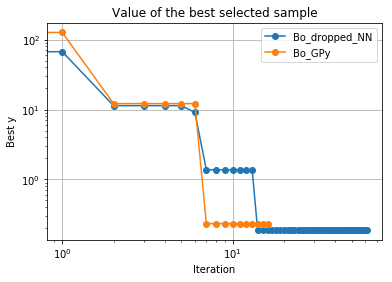

In [29]:
### 8_DIMENTIONAL ###

new_plot_convergence(bo, bo_gpy, "1m_8d_0,5kp")

# DIFFERENT

In [ ]:
#print('BO_with_droppedoutNN: ')
#bo.plot_acquisition()
#print('BO_only_with_GPyOpt:  ')
#bo_without_NN.plot_acquisition()

#bo.plot_convergence()
#bo_gpy.plot_convergence()

In [ ]:
     '''
        t_new = time.time()
        if abs(t_new - self.t) > 30:
            fx_opt = self.fx_opt
            print(np.round(-self.t_global + t_new, 0), 's |', 'fmin = ', np.round(-fmin, 3))
            self.t = time.time()
     '''

In [127]:
#JITTER VERSION

from GPyOpt.acquisitions.base import AcquisitionBase
from GPyOpt.acquisitions.EI import AcquisitionEI
from numpy.random import beta
from scipy.special import erfc


class Exp_impr(AcquisitionBase):
    
    analytical_gradient_prediction = False
    
    def __init__(self, model, space, optimizer=None, cost_withGradients=None, par_a=1, par_b=1, num_samples= 10):
        super(Exp_impr, self).__init__(model, space, optimizer)
        
        self.par_a = par_a
        self.par_b = par_b
        self.num_samples = num_samples
        self.samples = beta(self.par_a,self.par_b,self.num_samples)
        self.EI = AcquisitionEI(model, space, optimizer, cost_withGradients)
        #self.t = time.time()
        #self.t_global = self.t
        
    def compute_exp_impr(self, x):
        jitter = self.EI.jitter
        m, s = self.model.predict(x)
        fmin = self.model.get_fmin()
        phi, Phi, u = self.get_quantiles(jitter, fmin, m, s)
        
        f_acqu = s * (u * Phi + phi)
        cost_x, _ = self.cost_withGradients(x)
        return -(f_acqu*self.space.indicator_constraints(x))/cost_x
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[None,:]
        m, s = get_assessed_val(x)
        s = np.clip(s, 1e-10, np.inf)
        return -m, s

    def get_quantiles(self, acquisition_par, fmin, m, s):
    
        if isinstance(s, np.ndarray):
            s[s<1e-10] = 1e-10
        elif s< 1e-10:
            s = 1e-10
        u = (fmin - m - acquisition_par)/s
        phi = np.exp(-0.5 * u**2) / np.sqrt(2*np.pi)
        Phi = 0.5 * erfc(-u / np.sqrt(2))
        return (phi, Phi, u)
    
    def acquisition_function(self,x):
        acqu_x = np.zeros((x.shape[0],1))       
        for k in range(self.num_samples):
            self.EI.jitter = self.samples[k]   
            acqu_x = acqu_x + self.compute_exp_impr(x)        
        return acqu_x/self.num_samples

In [ ]:
acquisition = Exp_impr(model, space, optimizer=aquisition_optimizer, par_a=1, par_b=10, num_samples=200)
evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

bo = GPyOpt.methods.ModularBayesianOptimization(model, space, objective, acquisition, evaluator, initial_design)